In [1]:
#packages for data collection, cleaning, modeling
import praw
import pandas as pd
import datetime as dt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

#packages for NLP of text
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#packages for visualizations
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# PRAW package usage adapted from https://towardsdatascience.com/scraping-reddit-with-praw-76efc1d1e1d9
# and http://www.storybench.org/how-to-scrape-reddit-with-python/
reddit = praw.Reddit(client_id='UEwCRbvfhdjVPw', \
                     client_secret='n039ppGbx7I5vSESTU3dM4h1U6A', \
                     user_agent='General Assembly Project 3', \
                     username='nmanahan', \
                     password='Ellieb317')

In [3]:
# selecting my two subreddits
country = reddit.subreddit('country')

hiphop = reddit.subreddit('hiphopheads')

In [4]:
# prepping for use of the top posts on both subreddits - curious as to if engagement(number of comments) with 
# OP is relevant
top_country = country.top(limit=1000)

top_hiphop = hiphop.top(limit=1000)

In [5]:
# checking for status of API request
for submission in country.top(limit=1):
    print(submission.title, submission.id)

Cowboy hat and all b0bv0y


In [6]:
# setting up dictionaries to store data from API requests
country_dict = { "title":[],
                 "score":[],
                 "id":[], 
                 "url":[], 
                 "comms_num": [],
                 "created": [],
                 "body":[]}

hiphop_dict = { "title":[],
                "score":[],
                "id":[],
                "url":[], 
                "comms_num": [],
                "created": [],
                "body":[]}

In [7]:
# organizing data from my API request into dictionary using for loop for next two cells
for submission in top_country:
    country_dict["title"].append(submission.title)
    country_dict["score"].append(submission.score)
    country_dict["id"].append(submission.id)
    country_dict["url"].append(submission.url)
    country_dict["comms_num"].append(submission.num_comments)
    country_dict["created"].append(submission.created)
    country_dict["body"].append(submission.selftext)

In [8]:
for submission in top_hiphop:
    hiphop_dict["title"].append(submission.title)
    hiphop_dict["score"].append(submission.score)
    hiphop_dict["id"].append(submission.id)
    hiphop_dict["url"].append(submission.url)
    hiphop_dict["comms_num"].append(submission.num_comments)
    hiphop_dict["created"].append(submission.created)
    hiphop_dict["body"].append(submission.selftext)

In [9]:
# converting to DataFrame to see data organized
country_data = pd.DataFrame(country_dict)

In [10]:
country_data

,title,score,id,url,comms_num,created,body
0,Cowboy hat and all,237,b0bv0y,https://i.redd.it/1na5a3w2oql21.jpg,6,1.552419e+09,
1,Just a map of the places in Texas where George...,225,8nfzfs,https://i.redd.it/xks19qlqo4111.jpg,10,1.527746e+09,
2,"First time in USA, and I had to go there",215,94xwwb,https://i.redd.it/e8jj3rc28ee11.jpg,11,1.533526e+09,
3,Apologies if it's a repost.,207,ayd5r7,https://i.redd.it/am1q8997hpk21.jpg,12,1.551969e+09,
4,Josh Gracin speaks out against Miley Cyrus' an...,187,1l3b6s,http://i.imgur.com/Nx0DiSW.jpg,37,1.377483e+09,
5,/r/AdviceAnimals didn't like me very much for ...,182,1eug6j,http://www.quickmeme.com/meme/3uibp8/,30,1.369243e+09,
6,Tyler Childers on Ticket Scalpers,179,84dsky,https://i.redd.it/eoxatkymoql01.png,12,1.521038e+09,
7,Me_irl,172,9q4uw4,https://i.redd.it/alrovldlfkt11.jpg,7,1.540139e+09,
8,I hate that every new country song is using th...,165,a6arie,https://www.youtube.com/watch?v=aT9iox7jH1g,29,1.544835e+09,
9,Visited the legend today. RIP Sr.,156,azc4wa,https://i.redd.it/0mlurt8ny7l21.jpg,8,1.552192e+09,


In [11]:
hiphop_data = pd.DataFrame(hiphop_dict)
hiphop_data

,title,score,id,url,comms_num,created,body
0,Mac Miller Dead at 26,40348,9dy5v3,http://www.tmz.com/2018/09/07/mac-miller-dead-...,5321,1.536352e+09,
1,[FRESH] Pusha T - THE STORY OF ADIDON ( Drake ...,39619,8n43e3,https://soundcloud.com/pushat/the-story-of-adidon,8765,1.527639e+09,
2,[Developing Story] XXXTentacion might be dead?,31737,8s2mxk,https://www.reddit.com/r/hiphopheads/comments/...,13535,1.529353e+09,**NSFL** DONT CLICK UNLESS YOURE 100% SURE YOU...
3,Eminem - Killshot (MGK Diss),28926,9fuojl,https://audiomack.com/song/eminem/killshot,7527,1.536951e+09,
4,[FRESH] Childish Gambino - This Is America,27322,8hcrvd,https://www.youtube.com/watch?v=VYOjWnS4cMY,2473,1.525579e+09,
5,[FRESH ALBUM] Kanye West - ye,27117,8nr8dy,https://play.google.com/store/music/album/Kany...,5599,1.527854e+09,
6,[FRESH ALBUM] Lil Wayne - Tha Carter V,26245,9jjpkm,https://www.reddit.com/r/hiphopheads/comments/...,6405,1.538107e+09,[Apple Music Link](https://itunes.apple.com/us...
7,21 Savage arrested by ICE,25661,amtixa,https://www.reddit.com/r/hiphopheads/comments/...,6136,1.549225e+09,https://mobile.twitter.com/MarkWinneWSB/status...
8,"[FRESH] Kendrick Lamar: ""Humble"" (Single)",25367,62hhm2,https://www.youtube.com/watch?v=tvTRZJ-4EyI,3192,1.490915e+09,
9,[FRESH ALBUM] Eminem - Kamikaze,25150,9bqeu5,https://open.spotify.com/album/3HNnxK7NgLXbDox...,7637,1.535688e+09,


In [12]:
# converting created information to date/time
def get_date(created):
    return dt.datetime.fromtimestamp(created)

_timestamp = country_data["created"].apply(get_date)

country_data = country_data.assign(timestamp = _timestamp)

country_data

_timestamp = hiphop_data["created"].apply(get_date)

hiphop_data = hiphop_data.assign(timestamp = _timestamp)

hiphop_data

,title,score,id,url,comms_num,created,body,timestamp
0,Cowboy hat and all,237,b0bv0y,https://i.redd.it/1na5a3w2oql21.jpg,6,1.552419e+09,,2019-03-12 14:23:39
1,Just a map of the places in Texas where George...,225,8nfzfs,https://i.redd.it/xks19qlqo4111.jpg,10,1.527746e+09,,2018-05-31 00:51:26
2,"First time in USA, and I had to go there",215,94xwwb,https://i.redd.it/e8jj3rc28ee11.jpg,11,1.533526e+09,,2018-08-05 22:34:56
3,Apologies if it's a repost.,207,ayd5r7,https://i.redd.it/am1q8997hpk21.jpg,12,1.551969e+09,,2019-03-07 08:27:09
4,Josh Gracin speaks out against Miley Cyrus' an...,187,1l3b6s,http://i.imgur.com/Nx0DiSW.jpg,37,1.377483e+09,,2013-08-25 21:14:36
5,/r/AdviceAnimals didn't like me very much for ...,182,1eug6j,http://www.quickmeme.com/meme/3uibp8/,30,1.369243e+09,,2013-05-22 12:24:45
6,Tyler Childers on Ticket Scalpers,179,84dsky,https://i.redd.it/eoxatkymoql01.png,12,1.521038e+09,,2018-03-14 09:29:24
7,Me_irl,172,9q4uw4,https://i.redd.it/alrovldlfkt11.jpg,7,1.540139e+09,,2018-10-21 11:29:38
8,I hate that every new country song is using th...,165,a6arie,https://www.youtube.com/watch?v=aT9iox7jH1g,29,1.544835e+09,,2018-12-14 18:54:41
9,Visited the legend today. RIP Sr.,156,azc4wa,https://i.redd.it/0mlurt8ny7l21.jpg,8,1.552192e+09,,2019-03-09 22:29:21


In [14]:
# saving as CSV to come back to if neeeded
country_data.to_csv('country_data.csv', index=False)

hiphop_data.to_csv('hiphop_data.csv', index=False)

In [15]:
# creating y value column to check predictions of my two models
hiphop_data['is_hiphop'] = 1

country_data['is_hiphop'] = 0

In [16]:
# combining the two subreddits DFs into single DF for further text/data cleaning
data = pd.concat([hiphop_data, country_data], ignore_index=True)
data

,title,score,id,url,comms_num,created,body,timestamp,is_hiphop
0,Mac Miller Dead at 26,40348,9dy5v3,http://www.tmz.com/2018/09/07/mac-miller-dead-...,5321,1.536352e+09,,2018-09-07 15:23:20,1
1,[FRESH] Pusha T - THE STORY OF ADIDON ( Drake ...,39619,8n43e3,https://soundcloud.com/pushat/the-story-of-adidon,8765,1.527639e+09,,2018-05-29 19:14:47,1
2,[Developing Story] XXXTentacion might be dead?,31737,8s2mxk,https://www.reddit.com/r/hiphopheads/comments/...,13535,1.529353e+09,**NSFL** DONT CLICK UNLESS YOURE 100% SURE YOU...,2018-06-18 15:12:17,1
3,Eminem - Killshot (MGK Diss),28926,9fuojl,https://audiomack.com/song/eminem/killshot,7527,1.536951e+09,,2018-09-14 13:49:07,1
4,[FRESH] Childish Gambino - This Is America,27322,8hcrvd,https://www.youtube.com/watch?v=VYOjWnS4cMY,2473,1.525579e+09,,2018-05-05 23:00:53,1
5,[FRESH ALBUM] Kanye West - ye,27117,8nr8dy,https://play.google.com/store/music/album/Kany...,5599,1.527854e+09,,2018-06-01 06:45:10,1
6,[FRESH ALBUM] Lil Wayne - Tha Carter V,26245,9jjpkm,https://www.reddit.com/r/hiphopheads/comments/...,6405,1.538107e+09,[Apple Music Link](https://itunes.apple.com/us...,2018-09-27 22:55:10,1
7,21 Savage arrested by ICE,25661,amtixa,https://www.reddit.com/r/hiphopheads/comments/...,6136,1.549225e+09,https://mobile.twitter.com/MarkWinneWSB/status...,2019-02-03 14:19:19,1
8,"[FRESH] Kendrick Lamar: ""Humble"" (Single)",25367,62hhm2,https://www.youtube.com/watch?v=tvTRZJ-4EyI,3192,1.490915e+09,,2017-03-30 18:00:17,1
9,[FRESH ALBUM] Eminem - Kamikaze,25150,9bqeu5,https://open.spotify.com/album/3HNnxK7NgLXbDox...,7637,1.535688e+09,,2018-08-30 23:03:07,1


In [17]:
# removing some punctutation from the title column
data['title'] = data['title'].str.lower().str.replace('[', '').str.replace(']', '')

In [18]:
#removing http protocol from the url column
data['url'] = data['url'].str.replace('http://', '').str.replace('https://', '')
data['url'] = data['url'].str.replace('www.', '').str.replace('.com', ' ').str.replace('/', ' ')

In [19]:
#saving clean data DF to csv
data.to_csv('text_clean_with_numbers.csv', index=False)

In [20]:
data.columns

Index(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body',
       'timestamp', 'is_hiphop'],
      dtype='object')

In [21]:
#setting up X and y for CV and NB model
features = ['title', 'score', 'comms_num', 'created']
X = data[features]
y = data['is_hiphop']

In [22]:
y.value_counts()

0    1000
1     995
Name: is_hiphop, dtype: int64

In [23]:
#train test splitting for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [24]:
#Getting basleine accuracy for our train data set - 50.2%
y_train.value_counts(normalize=True)

1    0.502506
0    0.497494
Name: is_hiphop, dtype: float64

In [25]:
train_text = X_train['title']
test_text = X_test['title']

In [70]:
#instantiating count vectorizer to process text
vectorizer = CountVectorizer() 

In [71]:
#fitting, transforming, and converting text into Dataframe for easy analysis and use in our models.
vectorizer.fit(train_text)
train_data_features = pd.DataFrame(vectorizer.fit_transform(train_text).todense(), columns=vectorizer.get_feature_names())
test_data_features = pd.DataFrame(vectorizer.transform(test_text).todense(), columns=vectorizer.get_feature_names())




In [72]:
#instantiating our naive bayes model and predicting y values using the X_test data
nb = MultinomialNB()
model = nb.fit(train_data_features, y_train)
preds = nb.predict(test_data_features)

In [73]:
#scoring our models - they appear to have low bias and a slight variance. 
#Don't need to add interaction statists as I thought I would
print(nb.score(train_data_features, y_train))
print(nb.score(test_data_features, y_test))

0.9956140350877193
0.9649122807017544


In [31]:
# Checking accuracy, confusion matrix, sensitivity/specificity scores
# function adapted from the one and only local instructor Heather Robbins!
def metrics(y_test, y_predict):
    print('Accuracy score %s ' % accuracy_score(y_test, y_predict), '\n')
    print('----------------------------------------------------------------')
    print(pd.DataFrame(confusion_matrix(y_test, y_predict), 
                            index=['Actually_Country', 'Actually_Hiphop'], 
                            columns=['Predicted_Country', 'Predicted_Hiphop']), '\n')
    print('-----------------------------------------------------------------')
    print(classification_report(y_test, y_predict))
    print('-----------------------------------------------------------------')

In [32]:
metrics(y_test, preds)

Accuracy score 0.9649122807017544  

----------------------------------------------------------------
                  Predicted_Country  Predicted_Hiphop
Actually_Country                200                 6
Actually_Hiphop                   8               185 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       206
           1       0.97      0.96      0.96       193

   micro avg       0.96      0.96      0.96       399
   macro avg       0.97      0.96      0.96       399
weighted avg       0.96      0.96      0.96       399

-----------------------------------------------------------------


In [33]:
# creating another model to see if we can improve accuracy any further
# doing some additional preprocessing for word cloud visualization and the random forest model
is_hiphop = data[data['is_hiphop'] == 1]

is_country = data[data['is_hiphop'] == 0]

In [35]:
hiphop_words = is_hiphop['title']
country_words = is_country['title']

Hiphop_words


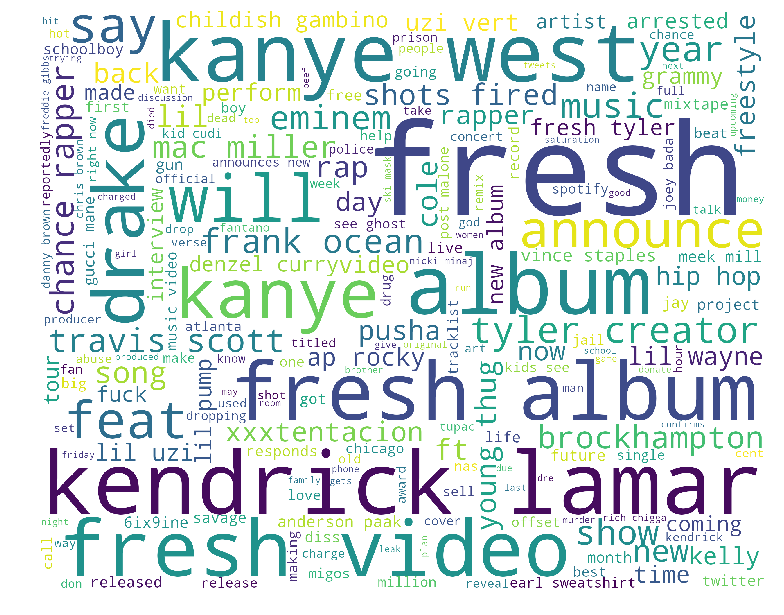

Country_words


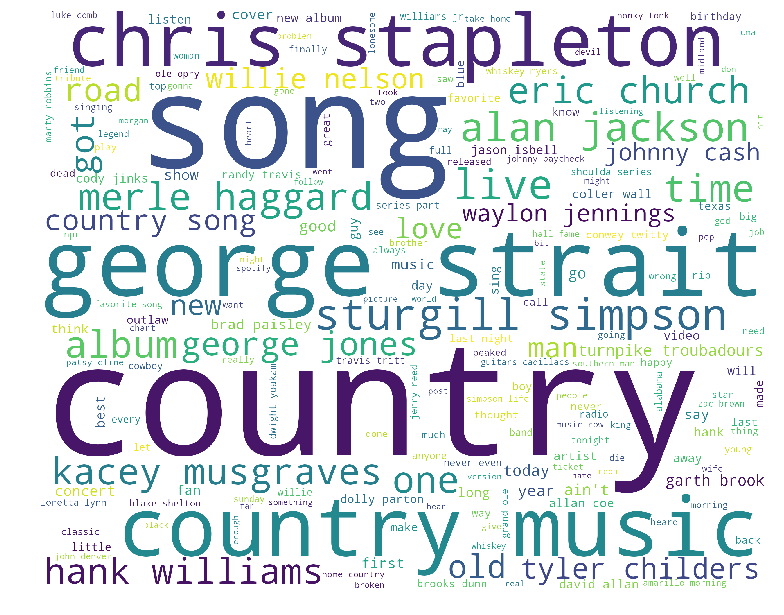

In [36]:
def wordcloud_draw(make_cloud):
    words = ' '.join(make_cloud)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color= "rgba(255, 255, 255, 0)", 
                      mode="RGBA",
                      width=2500,
                      height=2000,
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Hiphop_words")
wordcloud_draw(hiphop_words)
print("Country_words")
wordcloud_draw(country_words)

In [39]:
#creating list for sentiment analysis
sentiment_corpus = list(data['title'])

In [40]:
#instantiate SIA
sia = SentimentIntensityAnalyzer()

#Get polarity scores for the first tweet
sia.polarity_scores(sentiment_corpus[0])

{'neg': 0.518, 'neu': 0.482, 'pos': 0.0, 'compound': -0.6486}

In [41]:
# function adapted from CHI-FLEX-7 sentiment analysis exercise
dicts = []    

for tweet in sentiment_corpus:
    scores = sia.polarity_scores(tweet)
    scores['text'] = tweet
    dicts.append(scores)

sentiment_df = pd.DataFrame(dicts)
sentiment_df.head()

,compound,neg,neu,pos,text
0,-0.6486,0.518,0.482,0.000,mac miller dead at 26
1,0.3182,0.000,0.753,0.247,fresh pusha t - the story of adidon ( drake diss)
2,-0.6486,0.462,0.538,0.000,developing story xxxtentacion might be dead?
3,0.0000,0.000,1.000,0.000,eminem - killshot (mgk diss)
4,0.0258,0.259,0.471,0.271,fresh childish gambino - this is america


In [42]:
sentiment_df['is_hiphop'] = data['is_hiphop']

<Figure size 1080x504 with 0 Axes>

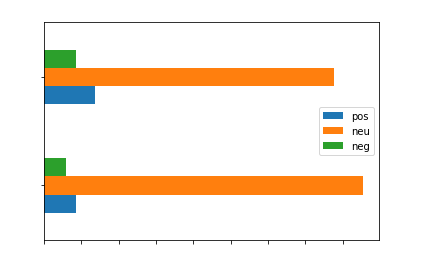

In [43]:
#eda on the sentiment analysis data

plt.figure(figsize=(15,7))

sentiment_df.groupby('is_hiphop').mean()[['pos', 'neu', 'neg']].plot(kind='barh')
plt.title('Average Positive vs. Negative vs. Neutral Score by Genre Subreddit', color='white')
plt.ylabel('Hip Hop (1) or Country (0)', color='white')
plt.xlabel('Percentage of Posts by Average Polarity', color='white')
plt.yticks(color='white')
plt.xticks(color='white');

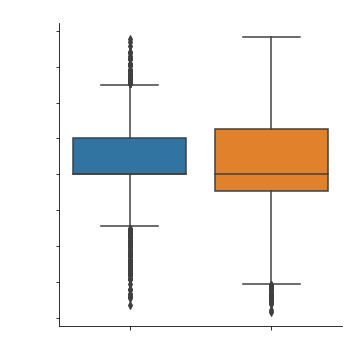

In [45]:
sns.catplot(x='is_hiphop', y='compound', kind='box', data=sentiment_df)
plt.title('Boxplot of Compound Scores', color='white')
plt.xlabel('Hiphop (1) or Country(2)', color='white')
plt.ylabel('Compound Score by Post', color='white')
plt.xticks(color='white')
plt.yticks(color='white');

In [47]:
#fitting new model with sentiment analysis data and post interaction data
X = sentiment_df[['text', 'compound', 'neg', 'neu', 'pos']]
y = sentiment_df['is_hiphop']

In [48]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
#instantiating CV for SA data, fitting and transforming text data
cv = CountVectorizer(stop_words =None, max_features=None, ngram_range = (2,5), min_df=3)

cv.fit(X_train2['text'])

X_train_cv2 = cv.transform(X_train2['text'])
X_test_cv2 = cv.transform(X_test2['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(2, 5), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [52]:
#converting to DF to add post interaction data back in again.
df_X_train = pd.DataFrame(X_train_cv2.todense(), columns=cv.get_feature_names())
df_X_test = pd.DataFrame(X_test_cv2.todense(), columns = cv.get_feature_names())

df_X_train.reset_index(drop=True, inplace=True)

X_train2.reset_index(drop=True, inplace=True)

df_X_test.reset_index(drop=True, inplace = True)

X_test2.reset_index(drop=True, inplace=True)

combined_X_train = pd.concat([df_X_train, X_train2], axis =1)
combined_X_test = pd.concat([df_X_test, X_test2], axis = 1)
combined_X_train.head(1)

In [55]:
#text column is redundant with the vectorized data and unneeded for modeling, dropping this column.
combined_X_train.drop(columns = 'text', inplace=True)

combined_X_test.drop(columns = 'text', inplace = True)

In [56]:
combined_X_test.shape

(399, 781)

In [57]:
combined_X_train.shape

(1596, 781)

In [58]:
y_train2.shape

(1596,)

In [59]:
y_test2.shape

(399,)

In [60]:
#instantiating RF Classifier
rfc = RandomForestClassifier()

In [61]:
rfc.fit(combined_X_train, y_train2)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
#scoring RF, model is significantly more overfit than the naive bayes model
rfc.score(combined_X_train, y_train), rfc.score(combined_X_test, y_test)

(0.9580200501253133, 0.8270676691729323)

In [74]:
#checking feature importances for insight into model performance
rfc_feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = combined_X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                    ascending=False)
rfc_feature_importances.head(20)

,importance
compound,0.066551
neu,0.054934
pos,0.043117
neg,0.034326
kendrick lamar,0.030768
fresh album,0.027574
kanye west,0.027537
chris stapleton,0.016411
sturgill simpson,0.016238
george strait,0.015482


In [64]:
preds2 = rfc.predict(combined_X_test)

In [65]:
#calling metrics function again for accuracy, sensitivity, specificity
metrics(y_test, preds2)

Accuracy score 0.8270676691729323  

----------------------------------------------------------------
                  Predicted_Country  Predicted_Hiphop
Actually_Country                181                25
Actually_Hiphop                  44               149 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       206
           1       0.86      0.77      0.81       193

   micro avg       0.83      0.83      0.83       399
   macro avg       0.83      0.83      0.83       399
weighted avg       0.83      0.83      0.83       399

-----------------------------------------------------------------
